# Device test Notebook

the goal of this notebook is to test the solution to create the device that will become the interface between the camera and the kafka broker

In [2]:
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt

In [6]:
all_camera_idx_available = []

for camera_idx in range(10):
    cap = cv2.VideoCapture(camera_idx)
    if cap.isOpened():
        print(f'Camera index available: {camera_idx}')
        all_camera_idx_available.append(camera_idx)
        cap.release()

Camera index available: 0
Camera index available: 2
Camera index available: 4


In [3]:
cap = cv2.VideoCapture(2)
print(cap.get(cv2.CAP_PROP_FPS))
cap.release()

30.0


In [ ]:
fps = 30
NB_SEC_TO_RECORD = fps * 5

## video capture

opencv is easy to use and video capture accept number (for usb camera) and url (for ip camera) this is handy. In future version we can imaging passing the argument to a docker container containing the code. this is a smart way to configure the video input.

In [4]:
cap = cv2.VideoCapture(2)
while(1):
    ret, frame = cap.read()
    cv2.imshow('frame', frame)
    #press q to quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

## Grayscale and gausian blur

in this step we apply a gaussian blur to the frame convert to grayscale.
This way we reduce noise which is mandatory to process image.

In [5]:
cap = cv2.VideoCapture(2)

while(1):
    ret1,frame1= cap.read()
    gray1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
    gray1 = cv2.GaussianBlur(gray1, (5, 5), 0)
    cv2.imshow('frame', gray1)
    #press q to quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

## Image difference

by substracting an image with an older one, we can show the difference between them. A.k.a a movement detection.


In [6]:
cap = cv2.VideoCapture(2)

ret1,old_frame = cap.read()
old_frame = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
old_frame = cv2.GaussianBlur(old_frame, (5, 5), 0)

while(1):
    
    ret1, new_frame = cap.read()
    
    new_frame = cv2.cvtColor(new_frame, cv2.COLOR_BGR2GRAY)
    new_frame = cv2.GaussianBlur(new_frame, (5, 5), 0)
    delta_frame=cv2.absdiff(old_frame, new_frame)
    
    old_frame = new_frame
    
    cv2.imshow('delta', delta_frame)
    #press q to quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

## Thresholding

In [7]:
cap = cv2.VideoCapture(2)

ret1,old_frame = cap.read()
old_frame = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
old_frame = cv2.GaussianBlur(old_frame, (5, 5), 0)

while(1):
    
    ret1, new_frame = cap.read()
    new_frame = cv2.cvtColor(new_frame, cv2.COLOR_BGR2GRAY)
    new_frame = cv2.GaussianBlur(new_frame, (5, 5), 0)
    delta_frame=cv2.absdiff(old_frame, new_frame)
    threshold_frame = cv2.threshold(delta_frame, 25, 255, cv2.THRESH_BINARY)[1]
    
    old_frame = new_frame
    
    cv2.imshow('delta', threshold_frame)
    #press q to quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

## Gradian edge detection


In [52]:
cap = cv2.VideoCapture(2)

while(1):
    ret1,frame1= cap.read()
    gray1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
    gray1 = cv2.GaussianBlur(gray1, (7, 7), 0)
    laplacian = cv2.Laplacian(gray1,cv2.CV_64F)
    threshold_frame = cv2.threshold(laplacian, 3, 255, cv2.THRESH_BINARY)[1]
    cv2.imshow('laplacian', threshold_frame)

    #press q to quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [47]:
cap = cv2.VideoCapture(2)

while(1):
    ret1,frame1= cap.read()
    gray1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
    gray1 = cv2.GaussianBlur(gray1, (7, 7), 0)
    sobelx = cv2.Sobel(gray1,cv2.CV_64F,1,0,ksize=3)
    sobely = cv2.Sobel(gray1,cv2.CV_64F,0,1,ksize=3)
    
    deriv_x_y = cv2.add(sobelx, sobely)

    threshold_frame = cv2.threshold(deriv_x_y, 25, 255, cv2.THRESH_BINARY)[1]
    cv2.imshow('Edge Pixels Detection', threshold_frame)

    #press q to quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# Ratio

In [28]:
cap = cv2.VideoCapture(2)

ret1,old_frame = cap.read()
old_frame = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
old_frame = cv2.GaussianBlur(old_frame, (5, 5), 0)

nb_total = old_frame.size

record_counter = 0
while(1):
    
    ret1, new_frame = cap.read()
    new_frame = cv2.cvtColor(new_frame, cv2.COLOR_BGR2GRAY)
    new_frame = cv2.GaussianBlur(new_frame, (5, 5), 0)
    delta_frame=cv2.absdiff(old_frame, new_frame)
    threshold_frame = cv2.threshold(delta_frame, 25, 255, cv2.THRESH_BINARY)[1]
    
    old_frame = new_frame
    nb_white = np.sum(threshold_frame == 255)
    
    ratio = nb_white / nb_total
    

    stri = '\rratio ' + str(ratio)
    print(stri, end="")
    
    cv2.imshow('delta', threshold_frame)
    #press q to quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

ratio 0.00578776041666666743

## Skeleton extraction

In [67]:
cap = cv2.VideoCapture(2)

ret1,old_frame = cap.read()
old_frame = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
old_frame = cv2.GaussianBlur(old_frame, (5, 5), 0)

while(1):
    
    ret1, new_frame = cap.read()
    new_frame = cv2.cvtColor(new_frame, cv2.COLOR_BGR2GRAY)
    new_frame = cv2.GaussianBlur(new_frame, (5, 5), 0)
    delta_frame=cv2.absdiff(old_frame, new_frame)
    threshold_frame1 = cv2.threshold(delta_frame, 25, 255, cv2.THRESH_BINARY)[1]
    threshold_frame1 = cv2.dilate(threshold_frame1,None)
    
    laplacian = cv2.Laplacian(new_frame,cv2.CV_8U)
    threshold_frame2 = cv2.threshold(laplacian, 3, 255, cv2.THRESH_BINARY)[1]
    
    deriv_x_y = cv2.add(threshold_frame1, threshold_frame2)
    threshold_frame = cv2.threshold(deriv_x_y, 3, 255, cv2.THRESH_BINARY)[1]
    
    old_frame = new_frame
    
    cv2.imshow('delta', threshold_frame)
    #press q to quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [ ]:
import cv2 

#https://docs.opencv.org/3.4/d5/d33/structcv_1_1HOGDescriptor.html
#https://www.etutorialspoint.com/index.php/316-human-body-detection-program-in-python-opencv
#https://learnopencv.com/histogram-of-oriented-gradients/

# Initializing the HOG person 
hog = cv2.HOGDescriptor() 
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector()) 
   
# Reading the Image 
image = cv2.imread('imagetest.webp') 
   

fshape = image.shape
fheight = fshape[0]
fwidth = fshape[1]
print(fwidth, fheight)  

resize_dim = 600

scale = resize_dim/fwidth

image = cv2.resize(image, None, fx=scale, fy=scale)

   
# Detecting all humans 
(humans, a) = hog.detectMultiScale(image,  
                                    winStride=(5, 5), 
                                    padding=(3, 3), 
                                    scale=1.21)
# getting no. of human detected
print('Human Detected : ', len(humans))

print(a)
   
# Drawing the rectangle regions
for (x, y, w, h) in humans: 
    cv2.rectangle(image, (x, y),  
                  (x + w, y + h),  
                  (0, 0, 255), 2) 
  
# Displaying the output Image 
cv2.imshow("Image", image) 
while(1):
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows() 

In [ ]:
import cv2 

#https://docs.opencv.org/3.4/d5/d33/structcv_1_1HOGDescriptor.html
#https://www.etutorialspoint.com/index.php/316-human-body-detection-program-in-python-opencv
#https://learnopencv.com/histogram-of-oriented-gradients/

# Initializing the HOG person 
hog = cv2.HOGDescriptor() 
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector()) 
   
# Reading the Image 
#image = cv2.imread('testimageempty.jpeg') 
image = cv2.imread('imagetest.webp') 
   

fshape = image.shape
fheight = fshape[0]
fwidth = fshape[1]
print(fwidth, fheight)  

resize_dim = 600

scale = resize_dim/fwidth

image = cv2.resize(image, None, fx=scale, fy=scale)

   
# Detecting all humans 
(humans, a) = hog.detect(image, winStride=(5, 5), padding=(3, 3))
# getting no. of human detected


if(a.any() > 0.2):
    print('Human Detected : ', len(humans))

(380, 507, 3)
(1764,)


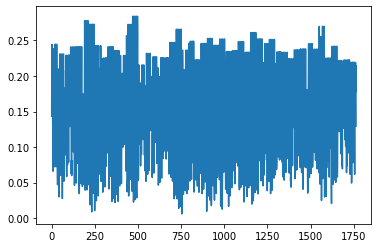

In [4]:

image = cv2.imread('imagetest.webp') 

winSize = (64,64)
blockSize = (16,16)
blockStride = (8,8)
cellSize = (8,8)
nbins = 9
derivAperture = 1
winSigma = 4.
histogramNormType = 0
L2HysThreshold = 2.0000000000000001e-01
gammaCorrection = 0
nlevels = 64
hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins,derivAperture,winSigma,
                        histogramNormType,L2HysThreshold,gammaCorrection,nlevels)
#compute(img[, winStride[, padding[, locations]]]) -> descriptors
winStride = (8,8)
padding = (8,8)
locations = ((10,20),)
hist = hog.compute(image,winStride,padding,locations)
print(image.shape)
print(hist.shape)
plt.plot(hist)

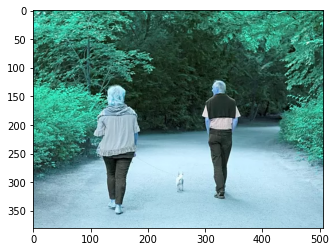

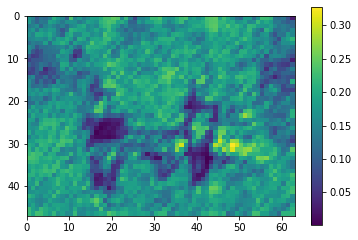

In [3]:
img = cv2.imread('imagetest.webp') 
cell_size = (8, 8)  # h x w in pixels
block_size = (2, 2)  # h x w in cells
nbins = 9  # number of orientation bins

# winSize is the size of the image cropped to an multiple of the cell size
hog = cv2.HOGDescriptor(_winSize=(img.shape[1] // cell_size[1] * cell_size[1],
                                  img.shape[0] // cell_size[0] * cell_size[0]),
                        _blockSize=(block_size[1] * cell_size[1],
                                    block_size[0] * cell_size[0]),
                        _blockStride=(cell_size[1], cell_size[0]),
                        _cellSize=(cell_size[1], cell_size[0]),
                        _nbins=nbins)

n_cells = (img.shape[0] // cell_size[0], img.shape[1] // cell_size[1])
hog_feats = hog.compute(img)\
               .reshape(n_cells[1] - block_size[1] + 1,
                        n_cells[0] - block_size[0] + 1,
                        block_size[0], block_size[1], nbins) \
               .transpose((1, 0, 2, 3, 4))  # index blocks by rows first
# hog_feats now contains the gradient amplitudes for each direction,
# for each cell of its group for each group. Indexing is by rows then columns.

gradients = np.zeros((n_cells[0], n_cells[1], nbins))

# count cells (border cells appear less often across overlapping groups)
cell_count = np.full((n_cells[0], n_cells[1], 1), 0, dtype=int)

for off_y in range(block_size[0]):
    for off_x in range(block_size[1]):
        gradients[off_y:n_cells[0] - block_size[0] + off_y + 1,
                  off_x:n_cells[1] - block_size[1] + off_x + 1] += \
            hog_feats[:, :, off_y, off_x, :]
        cell_count[off_y:n_cells[0] - block_size[0] + off_y + 1,
                   off_x:n_cells[1] - block_size[1] + off_x + 1] += 1

# Average gradients
gradients /= cell_count

# Preview
plt.figure()
plt.imshow(img, cmap='gray')
plt.show()

bin = 5  # angle is 360 / nbins * direction
plt.pcolor(gradients[:, :, bin])
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar()
plt.show()